In [2]:
%run 'Opening Files.ipynb'

In [3]:
   
pca = PCA(n_components=64)
    

S_=pca.fit_transform(matriz_serpentina)  
A_=pca.components_
scores = pca.explained_variance_ratio_


In [4]:
myarray=S_
data=((myarray-myarray.min())/(myarray.max()-myarray.min()))*(matriz_serpentina.max()-matriz_serpentina.min())+matriz_serpentina.min()

In [5]:
rest=np.dot(S_, A_) + pca.mean_

In [6]:
#mean = np.mean(matriz_serpentina, axis=0)
#matriz_serpentina -= mean

#U, S, V = np.linalg.svd(matriz_serpentina, full_matrices=False)
#n_samples, n_features = matriz_serpentina.shape

# Get variance explained by singular values
#explained_variance = (S ** 2) / (n_samples - 1)
#total_var = explained_variance.sum()
#explained_variance_ratio = explained_variance / total_var
#U, V = svd_flip(U, V)

In [7]:
components=S_

In [8]:
coordinates = np.dstack((components[:,0],components[:,1]))

In [9]:
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',assign_labels='kmeans',random_state=0)
labels = model.fit_predict(coordinates[0])

In [10]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [11]:
print ordenado

NameError: name 'ordenado' is not defined

In [12]:
position0 = [i for i,x in enumerate(labels) if x == 0]
position0 = np.array(position0).T
position1 = [i for i,x in enumerate(labels) if x == 1]
position1 = np.array(position1).T

In [13]:
coordinates0=coordinates[0][position0]
coordinates1=coordinates[0][position1]

In [14]:
rest=np.dot(S_, A_) + pca.mean_

In [15]:
rest1=rest[position0]

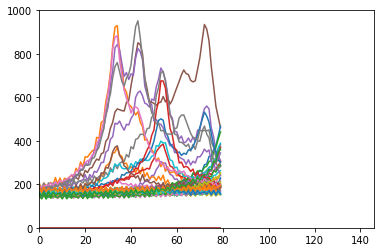

In [16]:
plt.plot(rest1)
plt.xlim(0,146)
plt.ylim(0, 1000)
plt.show()

In [17]:
rest2=rest[position1]

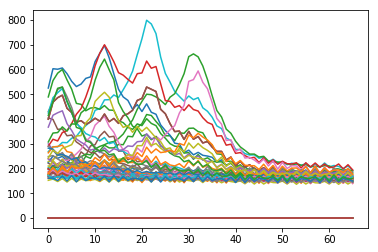

In [18]:
plt.plot(rest2)
plt.show()

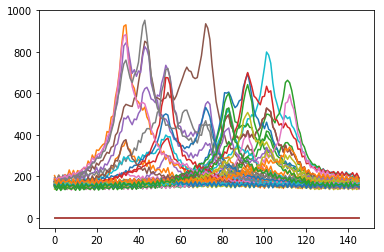

In [19]:
plt.plot(rest)
plt.show()

In [20]:
position0 = [i for i,x in enumerate(labels) if x == 0]
position0 = np.array(position0).T
position1 = [i for i,x in enumerate(labels) if x == 1]
position1 = np.array(position1).T
    
matrixcluster0=matriz_serpentina[position0]
matrixcluster1=matriz_serpentina[position1]

In [21]:
matrixcluster0[:,9].sum()

14484.0

In [22]:
matrixcluster1[:,9].sum()

24660.0

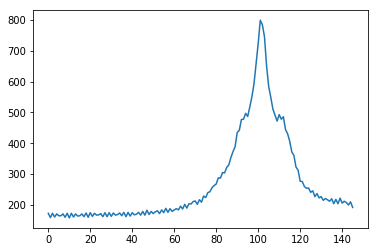

In [23]:
plt.plot(matriz_serpentina[:,9])
plt.show()

In [24]:
cluster0=np.array([])
cluster1=np.array([])
for i in range(64):
    if matrixcluster0[:,i].sum()>matrixcluster1[:,i].sum():
        cluster0=np.append(cluster0,i)
    else:
        cluster1=np.append(cluster1,i)
cluster0=cluster0.astype(int)
cluster1=cluster1.astype(int)

In [25]:
cluster0

array([ 0,  4,  6,  7,  8, 10, 11, 18, 19, 20, 21, 27, 28, 33, 34, 35, 41,
       44, 47, 49, 50, 51, 53, 55, 56, 57, 59, 60])

In [26]:
cluster1

array([ 1,  2,  3,  5,  9, 12, 13, 14, 15, 16, 17, 22, 23, 24, 25, 26, 29,
       30, 31, 32, 36, 37, 38, 39, 40, 42, 43, 45, 46, 48, 52, 54, 58, 61,
       62, 63])

In [27]:
matriz_serpentina[:,cluster0]

array([[156., 148., 164., ..., 176., 157., 161.],
       [154., 153., 166., ..., 173., 164., 146.],
       [161., 154., 172., ..., 178., 165., 168.],
       ...,
       [166., 156., 173., ..., 145., 171., 159.],
       [158., 145., 160., ..., 156., 154., 156.],
       [161., 154., 168., ..., 145., 168., 149.]])

In [28]:
matriz_serpentina[:,cluster1]

array([[  0.,   0.,   0., ..., 188., 156.,   0.],
       [  0.,   0.,   0., ..., 163., 148.,   0.],
       [  0.,   0.,   0., ..., 188., 164.,   0.],
       ...,
       [  0.,   0.,   0., ..., 183., 166.,   0.],
       [  0.,   0.,   0., ..., 200., 158.,   0.],
       [  0.,   0.,   0., ..., 176., 159.,   0.]])

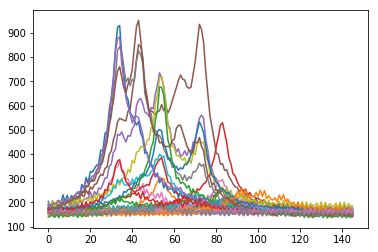

In [29]:
plt.plot(matriz_serpentina[:,cluster0])
plt.show()

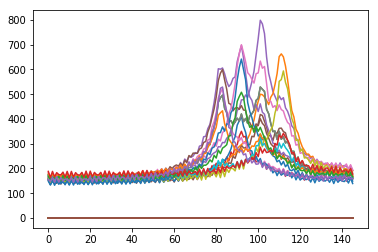

In [30]:
plt.plot(matriz_serpentina[:,cluster1])
plt.show()

In [31]:
len(cluster0)

28

In [32]:
import networkx as nx

def spanning_tree_from_edges(edges):
    graph = nx.Graph()

    for n1, n2 in edges:
        graph.add_edge(n1, n2)

    spanning_tree = nx.minimum_spanning_tree(graph)
    return spanning_tree

if __name__ == '__main__':
    edges = [(0, 3), (2, 1), (0, 2), (1, 3)]
    tree = spanning_tree_from_edges(edges)
    print(sorted(tree.edges()))

[(0, 2), (0, 3), (1, 2)]


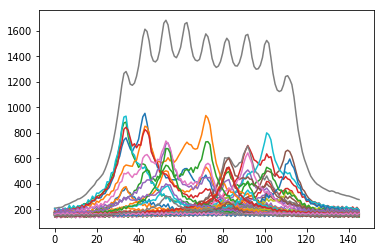

In [34]:

plt.plot(object_file["data"])
plt.show()